In [1]:
import tensorflow as tf
from converse import *

In [2]:
config = {
        'test':False,
        'learning_rate':0.08,
        'batch_size':200,
        'hidden_size':400,
        'num_layers':2,
        'use_lstm':True,#Else use GRU
        }

# Training

In [3]:
data = prepare() # Prepare data for training and validation
config['test'] = False
with tf.Session() as sess:
    merged = tf.summary.merge_all()
    train_writer = tf.summary.FileWriter('logs/', merged)
    model = create_model(sess, conf=config)
    previous_losses, validation_losses, train_ppx, val_ppx = train(sess, model, data, max_iter=5000)

Creating 400  of 2 layers
Reading model parameters from ../models/chatbot.ckpt-1600
Testing the model
INFO:tensorflow:Summary name Training loss is illegal; using Training_loss instead.
  eval: empty bucket 0
INFO:tensorflow:Summary name Validation loss is illegal; using Validation_loss instead.
Iter: 1800 Train loss: 0.0709331125725 validation loss: 0.0891306139529


KeyboardInterrupt: 

# Plots

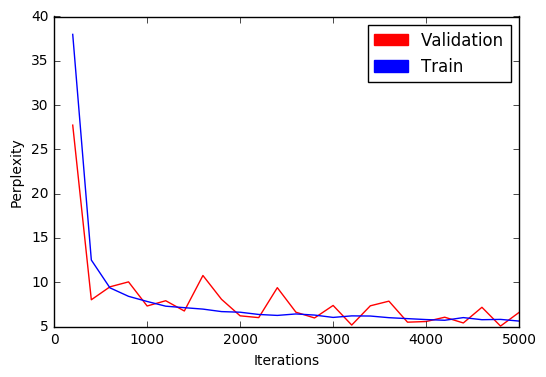

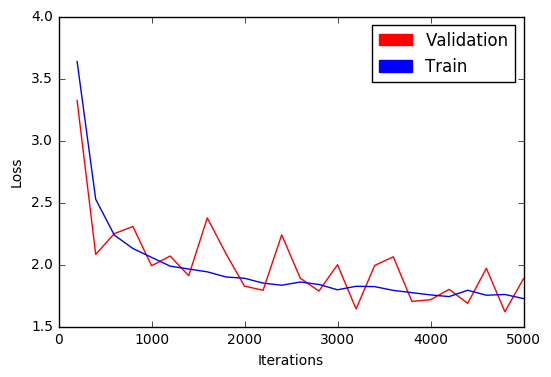

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='Validation')
blue_patch = mpatches.Patch(color='blue', label='Train')
iters = [i*200 for i in range(1,len(val_ppx)+1)]
plt.plot(iters, val_ppx, color='red')
plt.plot(iters, train_ppx, color='blue')
plt.legend(handles=[red_patch, blue_patch])
plt.xlabel('Iterations')
plt.ylabel('Perplexity')

plt.figure()
plt.plot(iters, validation_losses, color='red')
plt.plot(iters, previous_losses, color='blue')
plt.legend(handles=[red_patch, blue_patch])
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Test

In [3]:
import string
from nltk.stem.porter import *
stemmer = PorterStemmer()
replace_punctuation = string.maketrans(string.punctuation, ' '*len(string.punctuation))
def process(sent):
    sent = sent.strip().lower()
    sent = sent.translate(replace_punctuation)
    dialog = ''
    for w in sent.split():
        if not w.isalpha():
            w = 'DIGIT'
#         else:
#             try:
#                 w = stemmer.stem(w)
#             except:
#                 pass
        dialog += w + ' '
    print "Your dialog:", dialog
    return dialog

In [ ]:
config['test'] = True
with tf.Session() as sess:
    model = create_model(sess, conf=config)
    while True:
        sent = raw_input("You: ")
        sent = process(sent)
        print "Bot:",test(sess, model, sent)

Creating 400  of 2 layers
66536 400
Reading model parameters from ../models/chatbot.ckpt-1200
You: jacob you scared the shit out of me the feeling is mutual


Your dialog: jacob you scared the shit out of me the feeling is mutual 
Bot: Understanding question
Tokenized: [37314, 55985, 49598, 21209, 25630, 28840, 30876, 29042, 21209, 436, 25350, 49742]
scared the you to t out me here other is
You: shit out of me the feeling


Your dialog: shit out of me the feeling 
Bot: Understanding question
Tokenized: [25630, 28840, 30876, 29042, 21209, 436]
police the to scared scared understand for get feeling feeling
You: childhood this house it s where it all happened


Your dialog: childhood this house it s where it all happened 
Bot: Understanding question
Tokenized: [47053, 53121, 60545, 25353, 1662, 51422, 25353, 47714, 46958]
he hasn to t t t get
